<img src="title.jpg"> 

**INDEX**

I. Introduction
 - Hypothesis
 - Sources
 - The dataset

II. Repression and Democracy
 - The 4 types of regimes
 - Indices of Democracy and Repression of all countries
 - Count of countries according to their type of regime
 - Regional distribution of the regime types
 - Correlation between democracy and depression indices

III. Practices of digital repression: what does it consist of?
 - Variables of digital repression
 - Outliers

IV. Practices of digital repression: Comparison of each digital repression variable according to the type of regime
 - How far do the different repressive practices go according to the type of regime? Features od demodracies and autocracies
 - How are repressive practices related to the V-dem democracy index?
 - Which index of digital repression is least related to the index of democracy?

V. Practices of digital repression: Is there any relationship between the different forms of digital repression?

VI. CONCLUSIONS


----------------------------------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------------------------------

<h1><center>I. INTRODUCTION</center></h1>

## Hypothesis

We are going to study the relationship between democratic quality and digital repression. We want to answer questions like:
 - is it true that the least democratic countries are always the most repressive?
 - what exactly is digital repression?
 - what repressive methods characterize the different political regimes?
 - is there any relationship between the different types of digital repression?

## Sources

Feldstein, Steven (2022), “AI & Big Data Global Surveillance Index (2022 updated)”, 
https://data.mendeley.com/datasets/gjhf5y4xjp/4

Varieties of Democracy (V-Dem),
https://www.v-dem.net/


## The dataset

We have data from up to 179 countries, including regime type, democratic quality index, and levels of digital repression.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

In [3]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import os
import warnings
warnings.filterwarnings("ignore")
import plotly.io as plt_io

In [4]:

df = pd.read_csv('../data/DR_DI.csv')
df.shape

(179, 15)

In [5]:
df.head().append(df.tail())

,Country,Region,Year,v2x_polyarchy,v2x_libdem,v2x_regime,Digital Repression Index 2021,Gov SM surveillance v2smgovsmmon,Gov disinfo v2smgovdom,Pol party disinfo v2smpardom,Gov filtering v2smgovfilprc,Gov internet shutdowns v2smgovshut,Gov SM Shutdown v2smgovsm,Gov SM censorship v2smgovsmcenprc,Arrests online users (v2smarrest)
0,Afghanistan,SCA,2021,0.160,0.021,CA,0.817572,1.054,1.564,2.702,0.941,-0.202,0.710,-0.427,2.164
1,Albania,EUR,2021,0.478,0.403,EA,-0.291090,0.151,0.310,-0.130,0.117,-0.806,-1.582,-0.912,-1.250
2,Algeria,MENA,2021,0.284,0.145,EA,1.353596,2.140,1.675,0.594,1.720,1.383,1.974,1.302,1.370
3,Angola,AFR,2021,0.351,0.190,EA,-0.251762,0.129,-0.233,0.419,-0.879,-0.374,-0.608,-0.875,-1.048
4,Argentina,WHA,2021,0.819,0.658,ED,-1.131260,-0.507,-0.925,-1.205,-2.233,-1.849,-1.827,-1.670,-2.632
174,Vietnam,EAP,2021,0.220,0.126,CA,0.891468,1.522,0.932,-0.523,2.060,-0.344,0.119,1.515,2.367
175,Yemen,MENA,2021,0.112,0.033,CA,1.509764,1.385,2.543,2.754,1.826,1.248,1.226,1.881,2.073
176,Zambia,AFR,2021,0.379,0.296,EA,0.387025,1.405,0.953,2.501,-0.098,-0.127,-0.179,-1.000,0.893
177,Zanzibar,AFR,2021,0.263,0.198,EA,0.461811,0.729,0.522,0.345,-0.628,0.006,0.194,1.269,1.346
178,Zimbabwe,AFR,2021,0.281,0.189,EA,1.022687,1.153,2.169,2.392,0.445,0.659,0.428,0.579,2.552


- we change the column names to more explanatory ones:

In [6]:
df.rename(columns = 
{'v2x_libdem':'V-Dem Index',
'v2x_regime':'Regime type',
'Gov SM surveillance v2smgovsmmon':'SM surv.', 
'Gov filtering v2smgovfilprc':'Filtering', 
'Gov SM censorship v2smgovsmcenprc':'SM cens.',  
'Gov disinfo v2smgovdom':'GOV disinfo', 
'Pol party disinfo v2smpardom':'PP disinfo', 
'Gov internet shutdowns v2smgovshut':'Internet shutd.', 
'Gov SM Shutdown v2smgovsm':'SM shutd.',
'Arrests online users (v2smarrest)':'Arrests',
}, 
inplace = True)

<h1><center>II. REPRESSION & DEMOCRACY</center></h1>

# The 4 types of regimes


- There are two principles to measure the index 'V-Dem Democracy Index': 

**'Electoral'** refers to how representative the system is, taking into account whether the elections are fair and free, and whether there are independent media in the country in question.

**'Liberal'** refers to measures on the rule of law and the rule of law, transparency, or civil liberties.


- Classification of regimes:
The V-Dem Democracy Index is used to characterize and classify political regimes. This is important in order to be able to detect when one enters or leaves each of them, that is, at what point democracy erodes and approaches autocracy, or, conversely, when a regime advances from autocracy towards democracy.

We then have 4 types of regimes:
- Liberal Democracies (**LD**)
- Electoral Democracies (**ED**)
- Electoral Autocracies (**EA**)
- Closed Autocracies (**CA**)

<img src="regimens.png"> 

## Indices of Democracy and Repression of all countries:

In [7]:
import plotly.graph_objs as go

trace1 = go.Scatter(x = df['V-Dem Index'],
                    y = df['Country'],
                    name = 'V-Dem Index', 
                    mode= 'lines', 
                    marker = dict(color = 'rgba(0,255,0, 0.5)'), 
                    text = df['Country']) 

trace2 = go.Scatter(x = df['Digital Repression Index 2021'],
                    y = df['Country'],
                    name = 'Digital Repression Index 2021',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgba(255,255,0, 0.5)'),
                    text = df['Country'])

data = [trace1, trace2]
layout = dict(title = 'V-Dem Index and Digital Repression Index 2021')
fig = go.Figure(data = data, layout=layout)
fig.update_layout(
    width=1000,
    height=3000)

fig.layout.template = 'plotly_dark'

iplot(fig)

## Count of countries according to their type of regime:

We have 179 countries in the dataset (currently there are 193, but 14 have limited international recognition).
However, it does seem to us a significant sample space, although discouraging: more than half of the countries are not democracies.



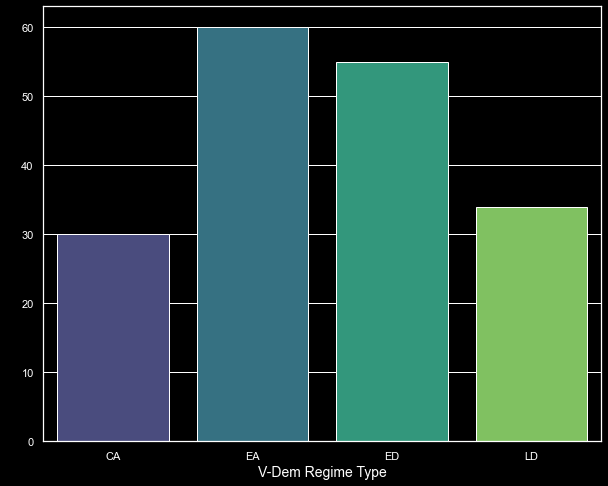

In [61]:
plt.style.use('dark_background')  

plt.figure(figsize=(10,8))
sns.countplot(x = df['Regime type'], palette='viridis')
plt.xlabel('V-Dem Regime Type', fontsize=14)
plt.ylabel(' ', fontsize=12);

## Regional distribution of the regime types:
- South and Central Asia (SCA)
- Europe (EUR)
- Middle East and North Africa (MENA)
- Central and Southern Africa (AFR)
- America (WHA)
- East Asia and the Pacific (EAP)

<Figure size 2880x2160 with 0 Axes>

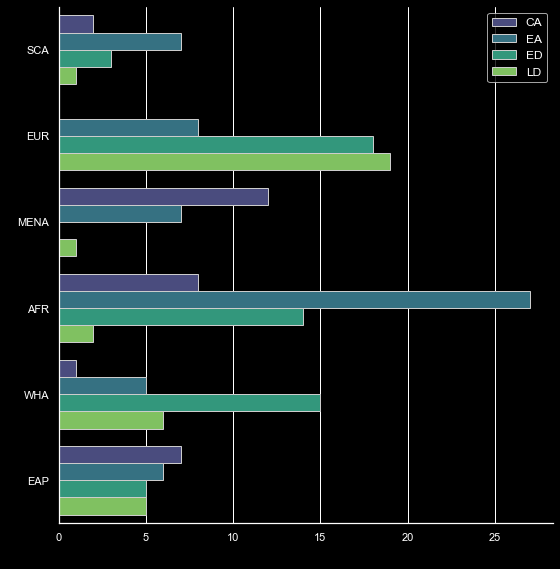

In [62]:
plt.figure(figsize=(40,30))

sns.catplot(y="Region", 
            hue="Regime type", 
            palette='viridis',
            kind="count",
            edgecolor=".8",
            orient = "H",
            height = 8, 
            data=df,
            legend= False,)

plt.xlabel(' ', fontsize=16)
plt.ylabel(' ', fontsize=8)
plt.legend(loc='upper right', prop={'size': 12});

<img src="map.jpg"> 

We see that the average V-dem democracy index varies significantly between regions:
- the least democratic regions are the Middle East and North Africa (MENA), South and Central Asia (SCA) and Central and Southern Africa (AFR)
- the most democratic are Europe (EUR), America (WHA) and East Asia and Pacific (EAP)

In [18]:
df.groupby('Region')[['V-Dem Index']].mean().sort_values(by='V-Dem Index', ascending=True)

,V-Dem Index
Region,
MENA,0.180050
SCA,0.235769
AFR,0.282882
EAP,0.379043
WHA,0.484481
EUR,0.606044


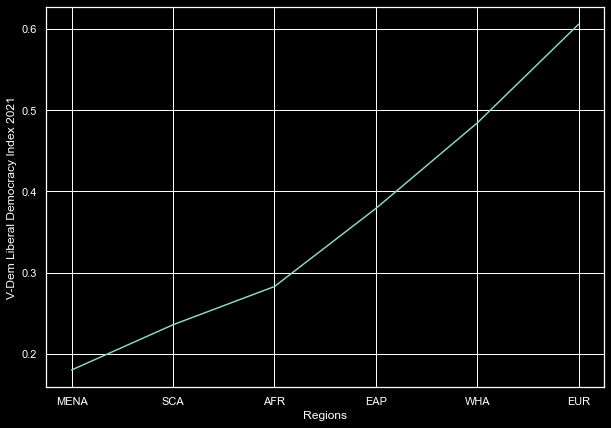

In [63]:
df.groupby('Region')[['V-Dem Index']].mean().sort_values(by='V-Dem Index', ascending=True).plot(figsize=(10, 7), legend=False);
plt.xlabel('Regions', fontsize=12)
plt.ylabel('V-Dem Liberal Democracy Index 2021', fontsize=12);

So does the 2021 Digital Repression Index:
- the most digitally repressive regions are South and Central Asia (SCA), the Middle East and North Africa (MENA), Central and southern Africa (AFR), and East Asia and the Pacific (EAP), all with positive values;
- the least repressive, with values below 0, are Europe (EUR) and America (WHA).


In [19]:
df.groupby('Region')[['Digital Repression Index 2021']].mean().sort_values(by='Digital Repression Index 2021', ascending=True)

,Digital Repression Index 2021
Region,
EUR,-0.751870
WHA,-0.363332
EAP,0.075865
AFR,0.277209
MENA,0.784244
SCA,0.928976


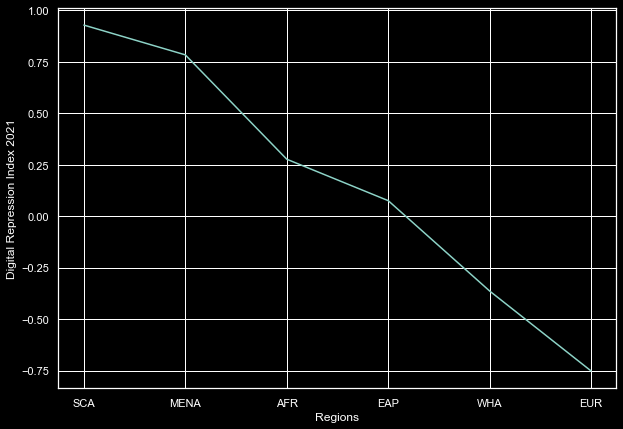

In [64]:
df.groupby('Region')[['Digital Repression Index 2021']].mean().sort_values(by='Digital Repression Index 2021', ascending=False).plot(figsize=(10, 7), legend=False);
plt.xlabel('Regions', fontsize=12)
plt.ylabel('Digital Repression Index 2021', fontsize=12);
#plt.legend('V-Dem Liberal Democracy Index 2021', loc='upper right', prop={'size': 18});

We study the variable Digital Repression Index 2021, which includes different values that we will see later: it does not present anomalous values: all countries maintain levels between -1.5 and 3 approximately, without any being unchecked.

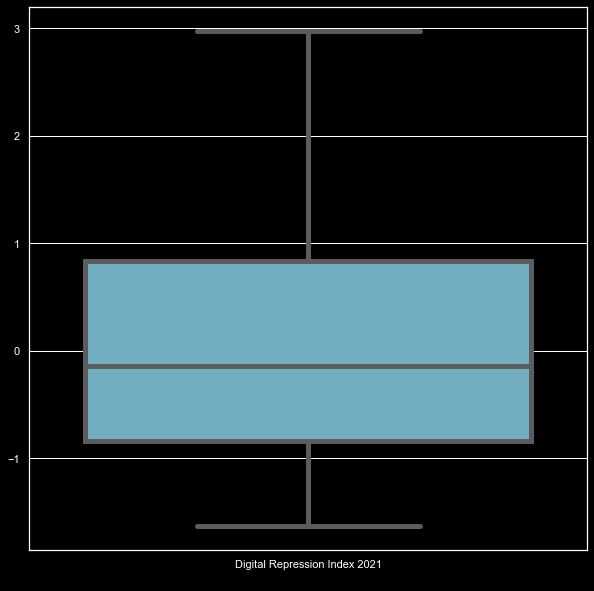

In [65]:
plt.figure(figsize=(10,10))
dri21 = df.iloc[::,6:7]
sns.boxplot(data=dri21, linewidth=5, color='c')
plt.xlabel(" ");

- the mean and median are very close
- the least repressive countries are in values below 0
- the most repressive, above
- we note that a few countries have very high levels, above 1.5

<Figure size 1080x1080 with 0 Axes>

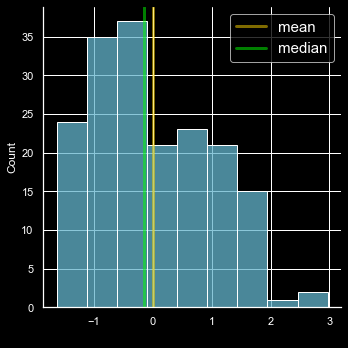

In [66]:
plt.figure(figsize=(15,15))

sns.displot(df["Digital Repression Index 2021"], kde=False, color='c')
plt.axvline(x=df['Digital Repression Index 2021'].mean(), linewidth=3, color='gold', label="mean", alpha=0.5)
plt.axvline(x=df['Digital Repression Index 2021'].median(), linewidth=3, color='lime', label="median", alpha=0.5)

plt.xlabel(" ")
plt.legend(["mean", "median"], prop={'size': 15});


 ## Correlation between democracy and depression indices


As we see below, there is a relationship between the Digital Repression Index 2021 and the types of regimes; it is clearly appreciated that autocracies are the most repressive countries:

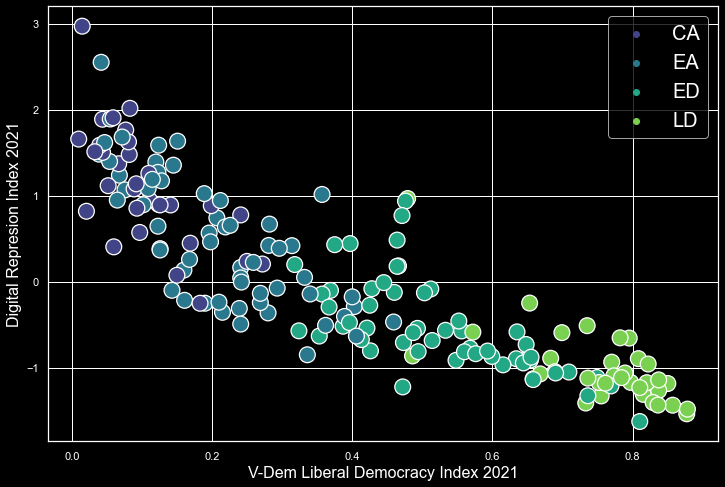

In [67]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['V-Dem Index'],
                y=df['Digital Repression Index 2021'],
                hue = df['Regime type'], 
                palette='viridis',
               s=250);
plt.xlabel('V-Dem Liberal Democracy Index 2021', fontsize=16)
plt.ylabel('Digital Represion Index 2021', fontsize=16)
plt.legend(loc='upper right', prop={'size': 20});

<h1><center>III. PRACTICES OF DIGITAL REPRESSION: what does it consist of?</center></h1>


## Variables of digital repression

We have seen the generalist variable 'Digital Repression Index 2021', but we are going to work with more specific ones to better understand the practices it consists of.

Digital repression is measured with 8 variables, distributed in 5 categories:

1. Surveillance: how comprehensive is the monitoring of political content on social networks carried out by the government and its agents.
2. Censorship of information and/or political content:
- frequency of use of filters on the Internet: use of tools that prevent a user from accessing different websites, applications, platforms, services on the Internet, etc.
- degree of factual censorship in social networks
3. Manipulation and social disinformation, that is, dissemination of misleading views and false information to influence the population, by:
- the government and its agents
- political parties and their candidates
4. Blocks to the access of:
- Internet
- social networks
5. Arrests of users for posting political content on the network.


<img src="repression_variables.jpg"> 

 ## Outliers


We study the 8 variables to detect countries that are exceptionally far from the typical values:

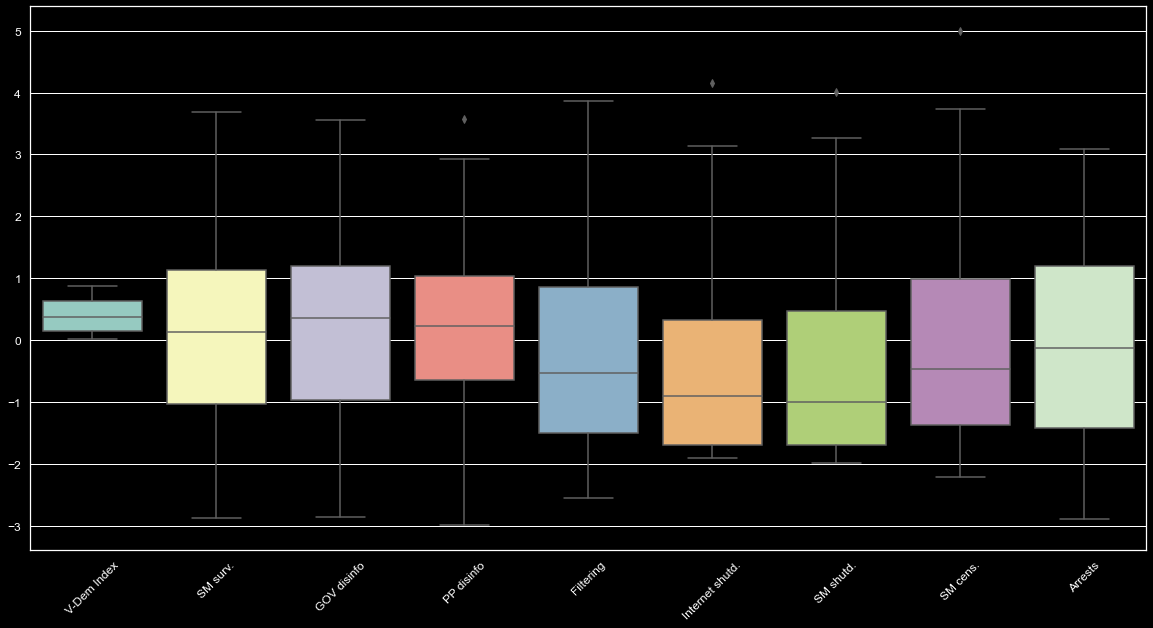

In [68]:
df_small = df.drop(columns=['Year','v2x_polyarchy','Digital Repression Index 2021'])

plt.figure(figsize=(20,10))
sns.boxplot(data=df_small, orient=90)
plt.xticks(fontsize=12, rotation = 45)
plt.yticks(fontsize=12)
plt.show();

We locate the outliers; as they can distort the analysis, it is necessary to study whether it is convenient to eliminate them or not:

In [32]:
df_small[['PP disinfo','Internet shutd.','SM shutd.','SM cens.']].max()

PP disinfo         3.566
Internet shutd.    4.147
SM shutd.          4.010
SM cens.           4.996
dtype: float64

In [41]:
df_small[df_small['PP disinfo'] == 3.566]

,Country,Region,V-Dem Index,Regime type,SM surv.,GOV disinfo,PP disinfo,Filtering,Internet shutd.,SM shutd.,SM cens.,Arrests
164,Turkmenistan,SCA,0.042,EA,2.445,3.555,3.566,3.194,3.134,3.261,3.734,2.12


In [37]:
df_small[df_small['Internet shutd.'] == 4.147]

,Country,Region,V-Dem Index,Regime type,SM surv.,GOV disinfo,PP disinfo,Filtering,Internet shutd.,SM shutd.,SM cens.,Arrests
113,North Korea,EAP,0.015,CA,3.689,2.627,2.127,3.869,4.147,4.01,4.996,3.091


In [29]:
df_small[df_small['SM shutd.'] == 4.01]

,Country,Region,V-Dem Index,Regime type,SM surv.,GOV disinfo,PP disinfo,Filtering,Internet shutd.,SM shutd.,SM cens.,Arrests
113,North Korea,EAP,0.015,CA,3.689,2.627,2.127,3.869,4.147,4.01,4.996,3.091


In [30]:
df_small[df_small['SM cens.'] == 4.996]

,Country,Region,V-Dem Index,Regime type,SM surv.,GOV disinfo,PP disinfo,Filtering,Internet shutd.,SM shutd.,SM cens.,Arrests
113,North Korea,EAP,0.015,CA,3.689,2.627,2.127,3.869,4.147,4.01,4.996,3.091


<img src="outliers.jpg"> 

We see that North Korea is the only anomalous value of three variables, let's remove it from the analysis.

In [42]:
df_after = df_small.copy()
df_after.shape

(179, 12)

In [43]:
df_after.drop([113], inplace=True)
df_after.shape

(178, 12)

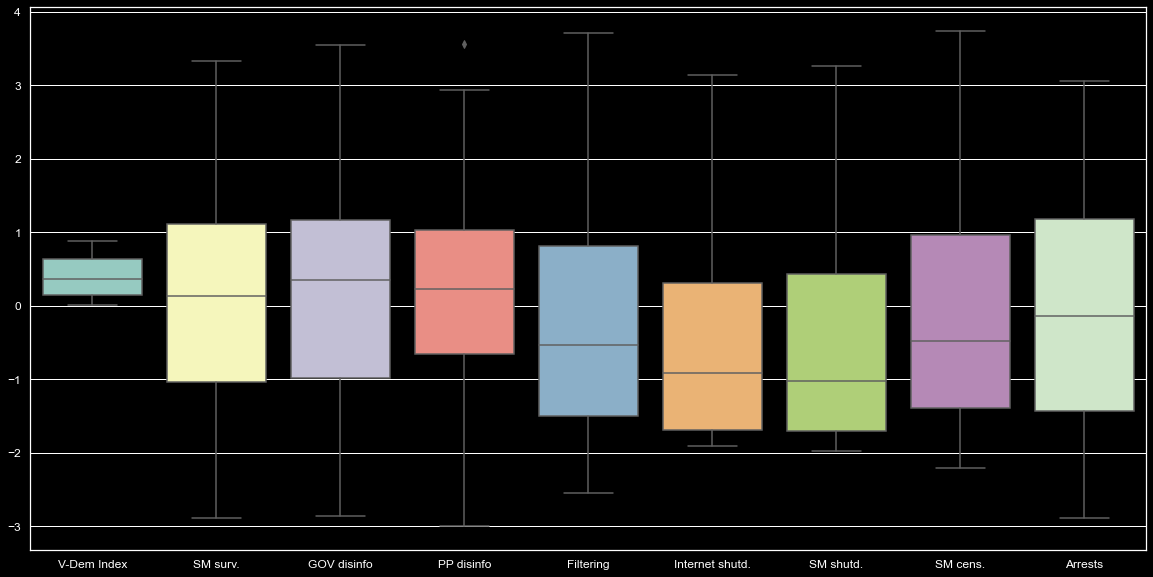

In [69]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_after)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show();

<h1><center>IV. PRACTICES OF DIGITAL REPRESSION: Comparison of each digital repression variable according to the type of regime</center></h1>


# 

## 1. How far do the different repressive practices go according to the type of regime?

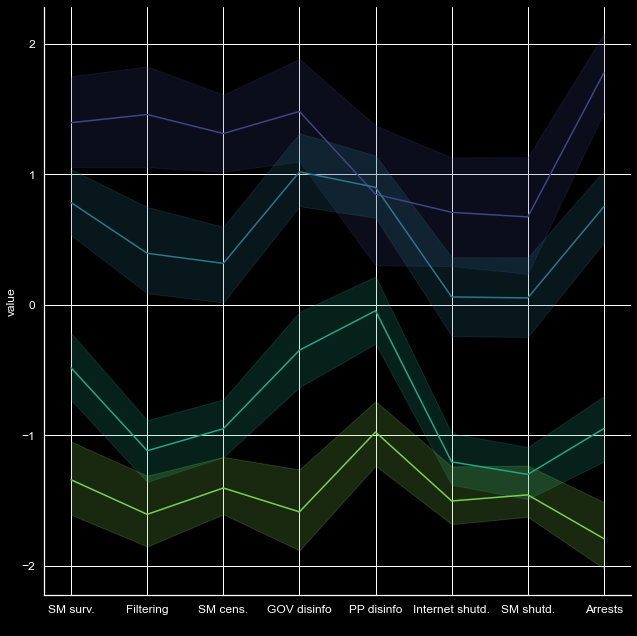

In [70]:
df_melted = df_after.melt(id_vars=['Country', 'Region', 'V-Dem Index', 'Regime type'], 
                        value_vars=[
                        'SM surv.', 
                        'Filtering', 
                        'SM cens.',
                        'GOV disinfo', 
                        'PP disinfo', 
                        'Internet shutd.',
                        'SM shutd.',
                        'Arrests'], 
                        var_name=' ')
colors = ['#414487FF','#2A788EFF','#22A884FF','#7AD151FF']
sns.relplot(data=df_melted, x = ' ', y = 'value', kind = 'line', hue = 'Regime type', palette=colors, height=9, legend=False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);


- ## Features of autocracies
We observe that both closed and electoral autocracies have almost coincident levels of disinformation coming from political parties ('PP disinfo'), that is, the high frequency of dissemination of false information by parties and candidates is similar in all types of autocracies, the differentiation between electoral and closed disappearing. To a lesser extent, both autocracies also maintain similar levels of government disinformation ('GOV disinfo').

- ## Features of democracies
Regarding democracies, we see that both liberal and electoral democracies do not differ much with regard to Internet and social network blockades ('Internet shut.'and 'SM shut.'), that is, democracies agree to maintain low levels of closures on the network, being especially cautious about social networks.
To a lesser extent, both maintain not very distant levels of censorship through filtering on the Internet ('Filtering') and content on social networks ('SM cens.').

## 2. How are repressive practices related to the V-dem democracy index?

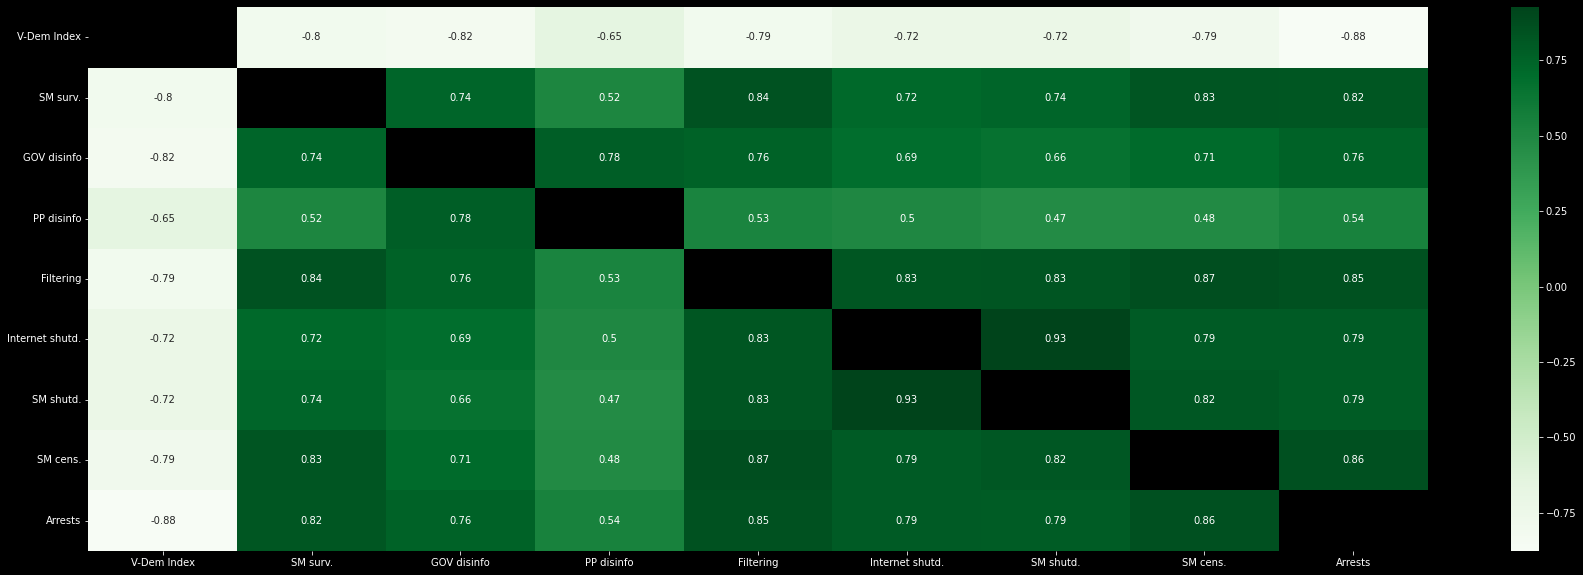

In [50]:
df_corr = df_after.corr()
df_filtered = df_corr[((df_corr >= .4) | (df_corr <= -.4)) & (df_corr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(df_filtered, annot=True, cmap="Greens")
plt.show()

We can affirm that, the worse the democratic quality, all the indices of digital repression increase, but especially:

- Arrests for posting political content ('Arrests')

<Figure size 1080x1440 with 0 Axes>

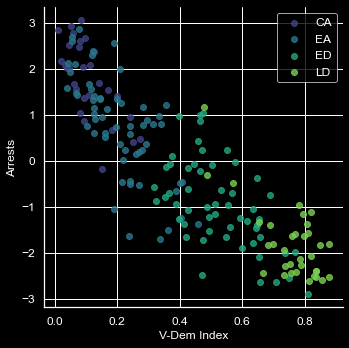

In [71]:
plt.figure(figsize=(15,20))
sns.lmplot(x="V-Dem Index", y="Arrests", data=df_after, hue="Regime type", palette='viridis',legend=False, fit_reg=False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(loc='upper right', prop={'size': 12});

- Misinformation by governments ('GOV disinfo')

<Figure size 1080x1440 with 0 Axes>

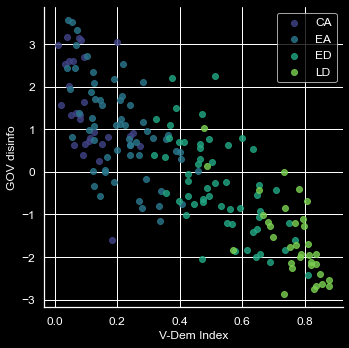

In [72]:
plt.figure(figsize=(15,20))
sns.lmplot(x="V-Dem Index", y="GOV disinfo", data=df_after, hue="Regime type", palette='viridis',legend=False, fit_reg=False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(loc='upper right', prop={'size': 12});

- Surveillance of Social Networks ('SM surv.')

<Figure size 1080x720 with 0 Axes>

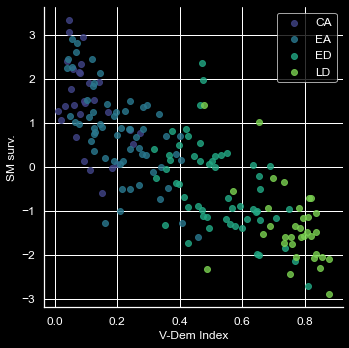

In [73]:
plt.figure(figsize=(15,10))
sns.lmplot(x="V-Dem Index", y="SM surv.", data=df_after, hue="Regime type", palette='viridis',legend=False, fit_reg=False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(loc='upper right', prop={'size': 12});

 - Censorship, both by RRSS and by Internet filters ('SM cens.' and 'Filtering')

<Figure size 1080x720 with 0 Axes>

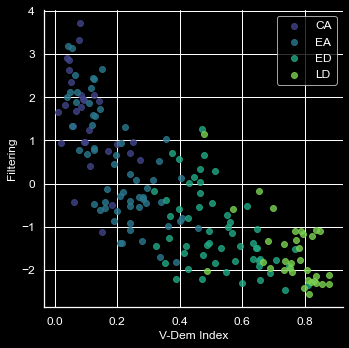

In [74]:
plt.figure(figsize=(15,10))
sns.lmplot(x="V-Dem Index", y="Filtering", data=df_after, hue="Regime type", palette='viridis',legend=False, fit_reg=False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(loc='upper right', prop={'size': 12});

 - Social Media censorship ('SM cens.'):

<Figure size 1080x720 with 0 Axes>

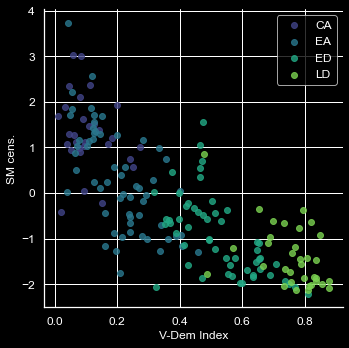

In [75]:
plt.figure(figsize=(15,10))
sns.lmplot(x="V-Dem Index", y="SM cens.", data=df_after, hue="Regime type", palette='viridis',legend=False, fit_reg=False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(loc='upper right', prop={'size': 12});



## And, which index of digital repression is least related to the index of democracy?
Disinformation by political parties.

This means that the dissemination of false information and/or misleading views by political parties and/or their candidates exists in almost the entire spectrum of political regimes, and, although there is a notable difference from liberal democracies, it is a practice that affects practically all countries of the world and their citizens.

We note that in a large number of electoral democracies, the misinformation spread by political parties and their candidates is at the level of some autocracies:

<Figure size 1080x720 with 0 Axes>

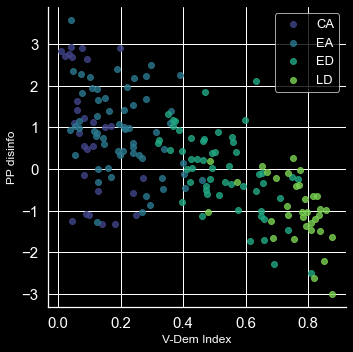

In [76]:
plt.figure(figsize=(15,10))

sns.lmplot(x="V-Dem Index", y="PP disinfo", data=df_after, hue="Regime type", palette='viridis',legend=False, fit_reg=False)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(loc='upper right', prop={'size': 13});


<h1><center>V. PRACTICES OF DIGITAL REPRESSION: Is there any relationship between the different types of digital repression?</center></h1>


We observe how all repressive practices (except the disinformation of political parties 'PP disinfo') are related to each other, that is, the increase of one of them entails to a greater or lesser extent, the increase of almost all the others. Let's identify the most related ones:

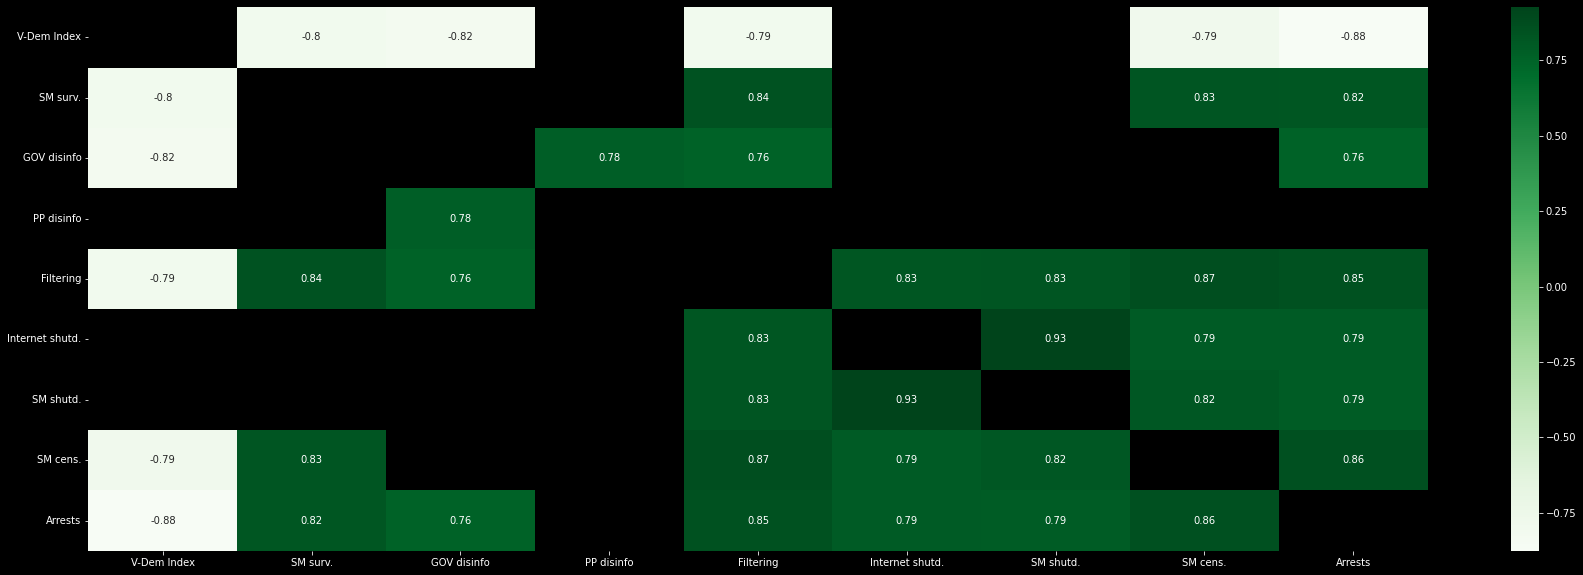

In [46]:
df_corr = df_after.corr()
df_filtered = df_corr[((df_corr >= .75) | (df_corr <= -.75)) & (df_corr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(df_filtered, annot=True, cmap="Greens")
plt.show()

1. The higher the frequency of filtering censorship, the higher the:
- Monitoring of content or information on social networks
- Misinformation by the government and its agents
- Internet and social media blockades
- Censorship of political content on social networks
- Arrests for posting political content

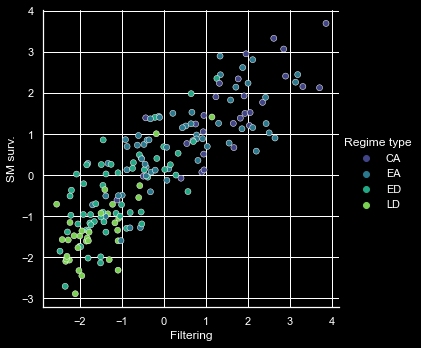

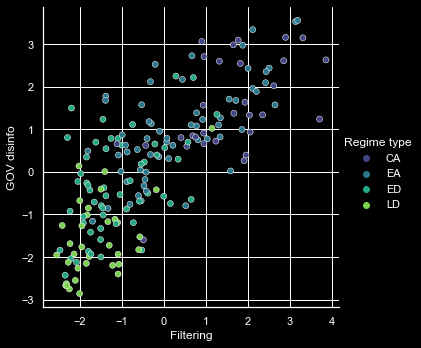

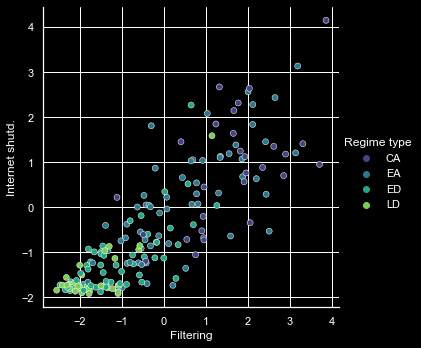

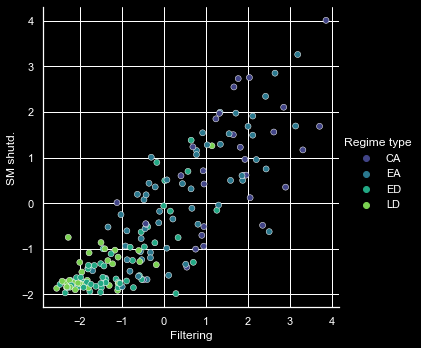

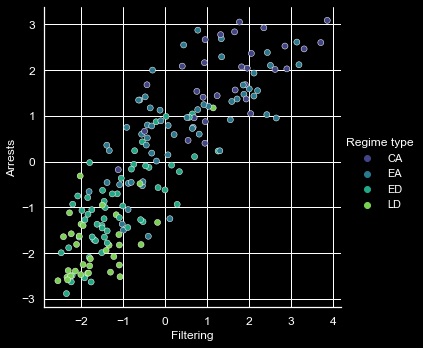

In [80]:
sns.relplot(x="Filtering", y="SM surv.",  ci=None, hue="Regime type", data=df_small, palette='viridis')
sns.relplot(x="Filtering", y="GOV disinfo",  ci=None, hue="Regime type", data=df_small, palette='viridis')
sns.relplot(x="Filtering", y="Internet shutd.",  ci=None, hue="Regime type", data=df_small, palette='viridis')
sns.relplot(x="Filtering", y="SM shutd.",  ci=None, hue="Regime type", data=df_small, palette='viridis')
sns.relplot(x="Filtering", y="Arrests",  ci=None, hue="Regime type", data=df_small, palette='viridis')


plt.yticks(fontsize=12)
plt.xticks(fontsize=12);


2. The greater the monitoring of political content, the more they increase:
- censorship (filters on the network and removal of content on social networks)
- the arrests of Internet users

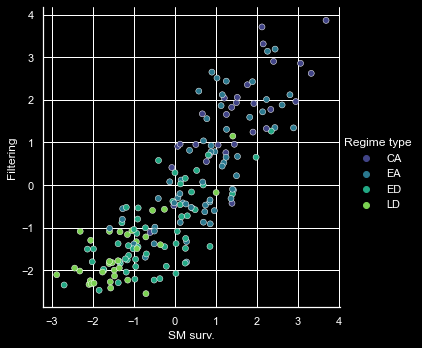

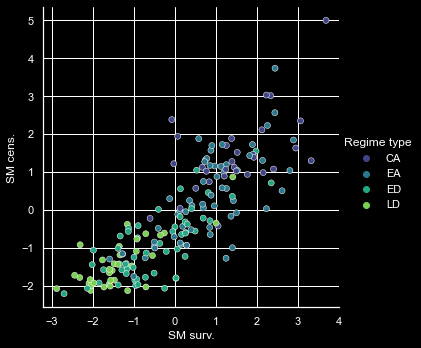

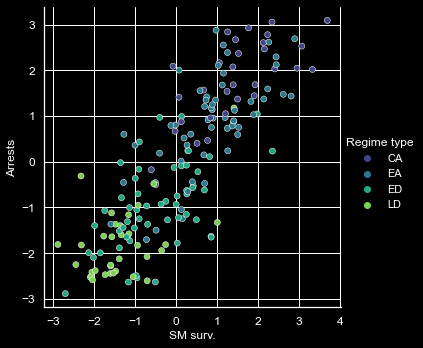

In [84]:
sns.relplot(x="SM surv.", y="Filtering",  ci=None, hue="Regime type", data=df_small, palette='viridis')
sns.relplot(x="SM surv.", y="SM cens.",  ci=None, hue="Regime type", data=df_small, palette='viridis')
sns.relplot(x="SM surv.", y="Arrests",  ci=None, hue="Regime type", data=df_small, palette='viridis')


plt.yticks(fontsize=12)
plt.xticks(fontsize=12);

3. The two practices most related to each other (with a correlation index close to 1):

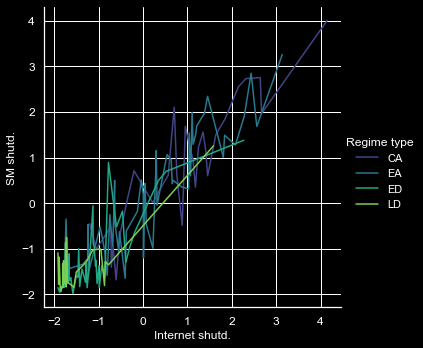

In [85]:
sns.relplot(x="Internet shutd.", y="SM shutd.", kind="line", ci=None, hue="Regime type", data=df_small, palette='viridis')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);

4. The more parties misinform, the more governments misinform, and vice versa. We note that autocracies stand out in both aspects.

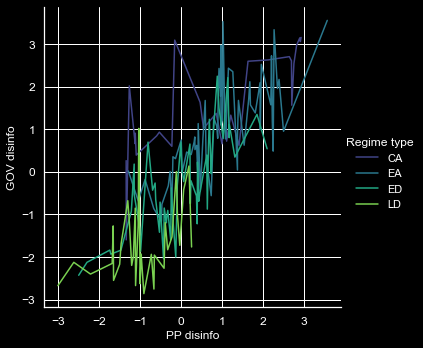

In [86]:

sns.relplot(x="PP disinfo", y="GOV disinfo", kind="line", ci=None, hue="Regime type", data=df_small, palette='viridis')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);


5. As the surveillance of the government and its agents increases, arrests for posting political content, censorship on social networks, and filtering on the Internet increase.

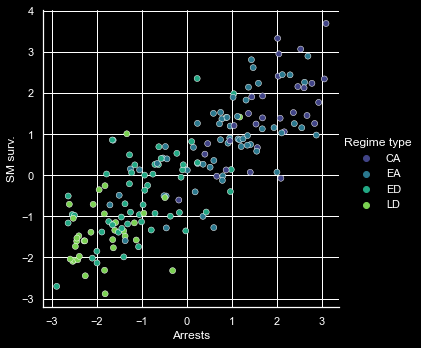

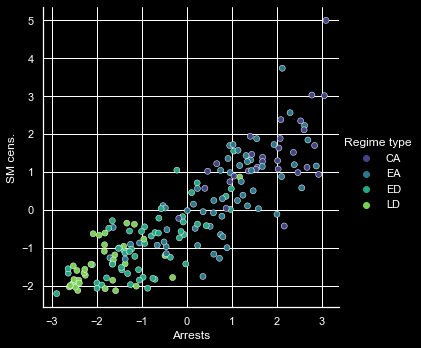

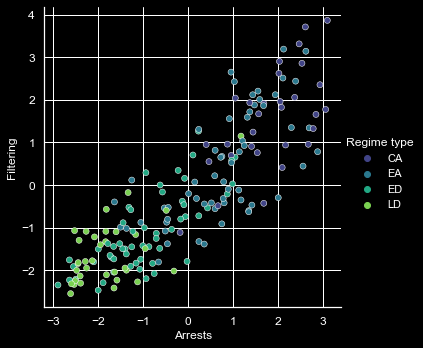

In [87]:
sns.relplot(x="Arrests", y="SM surv.",  ci=None, hue="Regime type", data=df_small, palette='viridis')
sns.relplot(x="Arrests", y="SM cens.",  ci=None, hue="Regime type", data=df_small, palette='viridis')
sns.relplot(x="Arrests", y="Filtering",  ci=None, hue="Regime type", data=df_small, palette='viridis')

plt.yticks(fontsize=12)
plt.xticks(fontsize=12);

<h1><center>VI. CONCLUSIONS</center></h1>


We are going to study the relationship between democratic quality and digital repression. We want to answer questions like:
 - is it true that the least democratic countries are always the most repressive?
 - what exactly is digital repression?
 - what repressive methods characterize the different political regimes?
 - is there any relationship between the different types of digital repression?